Copyright (c) 2017-2018 [Serpent-Tools developer team](https://github.com/CORE-GATECH-GROUP/serpent-tools/graphs/contributor), GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Sensitivity Reader

In [30]:
%matplotlib inline
from numpy import hstack
from matplotlib import pyplot
import serpentTools

In [31]:
sens = serpentTools.read('flattop_sens.m')


In [37]:
qty='keff'
zai='922380'
rxn='ela scatt xs'
mat='total'

In [38]:
resMat = sens.sensitivities[qty]
resMatEInt = sens.energyIntegratedSens[qty]
iMat = sens.materials[mat]
iZai = sens.zais[zai]
iPert = sens.perts[rxn]
# obtain a 2-sigma error distribution
val = resMatEInt[iMat, iZai, iPert, 0]
err = val * (1 + 2 * resMatEInt[iMat, iZai, iPert, 1])

In [39]:
yVals = resMat[iMat, iZai, iPert, :, 0] / sens.lethargyWidths
yErrs = resMat[iMat, iZai, iPert, :, 1]
# append last value of each for equal-sized plotting vectors
yVals = hstack((yVals, yVals[-1]))
yErrs = hstack((yErrs, yErrs[-1]))

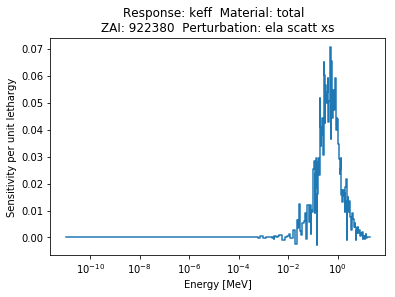

In [50]:
# pyplot.errorbar(sens.energies, yVals, yErrs, drawstyle='steps-post')
# short file has really bad uncertainties :D
pyplot.semilogx(sens.energies, yVals, drawstyle='steps-post')
pyplot.ylabel('Sensitivity per unit lethargy')
pyplot.xlabel('Energy [MeV]')
pyplot.title("Response: {}  Material: {}  \nZAI: {}  Perturbation: {}"
             .format(qty, mat, zai, rxn));